# **Final Project**

## **Project Setup**

In [103]:
# !rm -rf data plot_htmls screenshots

In [104]:
%%bash
pip install -U  altair vl-convert-python vega_datasets ipywidgets
mkdir data plot_htmls screenshots
jupyter nbextension enable --py widgetsnbextension
unzip archive.zip -d data/

bash: /home/kaungmyat/miniconda3/lib/libtinfo.so.6: no version information available (required by bash)


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


Archive:  archive.zip
  inflating: data/2015.csv           
  inflating: data/2016.csv           
  inflating: data/2017.csv           
  inflating: data/2018.csv           
  inflating: data/2019.csv           


In [105]:
# Uncomment this cell If you are using this notebook in colab which will restart after running this cell
# Notebook will be restart and select RunAfter from next cell
# If you setup the dependancy in your local pip environment you don't need it.
# import os
# os.kill(os.getpid(), 9)

In [106]:
!pip show altair

/bin/bash: /home/kaungmyat/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Name: altair
Version: 5.2.0
Summary: Vega-Altair: A declarative statistical visualization library for Python.
Home-page: 
Author: Vega-Altair Contributors
Author-email: 
License: 
Location: /home/kaungmyat/miniconda3/lib/python3.11/site-packages
Requires: jinja2, jsonschema, numpy, packaging, pandas, toolz
Required-by: 


## **Data Description**

### **Source**
Kaggle

### **Link**
https://www.kaggle.com/datasets/unsdsn/world-happiness

<br/>

### **Context**

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. Here, we are using 2016 version. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

<br/>

### **Content**

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for 2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

<br/>

### **What is Dystopia?**

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

<br/>

### **What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?**

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.




### **Low Fidelity**

- **Bar Chart for Happiness Rankings:**

  - Create a simple bar chart displaying the happiness rankings of different countries. Each bar represents a country, with the height corresponding to its happiness rank. This provides a quick overview of where each country stands in terms of happiness.
Scatter Plot for Correlation Analysis:

- **Scatter Plot for Correlation Analysis:**
  - Create a scatter plot between features to find the correlations of each other. ( Mainly correlations between Happiness Rank and others ).

- **Pie Chart for Regional Distribution:**

  - Develop a pie chart showing the distribution of countries by region. Each region is represented by a segment of the pie, with the size of the segment indicating the proportion of countries in that region. This helps in understanding the geographic distribution of happiness rankings.

- **Simple Line Chart for Some Features and Happiness Rank**

  - Create a line chart showing the trend of happiness ranks over some features.

- **Heatmap for Correlation Matrix:**

  - Design a heatmap to visualize the correlation matrix between happiness rankings and various factors. Each cell in the heatmap represents the correlation coefficient between two variables, with colors indicating the strength and direction of the correlation.


In [107]:
import pandas as pd
import altair as alt

# Assuming df is the DataFrame containing the happiness data
# Sort the DataFrame by happiness score
df = pd.read_csv('data/2016.csv')
df_sorted = df.sort_values(by='Happiness Score', ascending=False)

In [108]:
print("Current Version of Altair: ",alt.__version__)
assert alt.__version__ >= '5.2.0'

Current Version of Altair:  5.2.0


In [109]:
df_sorted.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [110]:
df_sorted.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [112]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

## **Data Distribuation of Regions Data**

We will construct the Interactive Pie Chart of Regions Data Distribution in the dataset.

The plot is interactive using the opacity on mouse hovering.

In [113]:
import pandas as pd
from altair import Theta
import altair as alt

source = pd.DataFrame({
    "category": df_sorted['Region'],
    "value": df_sorted['Happiness Rank']
})
selection = alt.selection_point(fields=['Region'], on='mouseover')
brush = alt.selection_interval()

pieChart = alt.Chart(df_sorted,title='Regions Data Distribution').mark_arc(innerRadius=50).encode(
    theta="Happiness Rank",
    color=alt.Color('Region', scale=alt.Scale(scheme='rainbow')),
    size="Generosity",
    tooltip=["Region", "Happiness Score"],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.4)),

).add_params(selection)

pieChart.save(f'./plot_htmls/pieChartDataDistribution.html', embed_options={'renderer':'svg'})
pieChart.save(f'./screenshots/pieChartDataDistribution.png')

pieChart

alt.Chart(...)

In [114]:
df_sorted.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### **Label Encoding**

In [115]:
# encoded_df = pd.get_dummies(df_sorted, columns=['Country', 'Region'])
# print(len(encoded_df.columns))
from sklearn.preprocessing import LabelEncoder

label_encoded = df_sorted.copy()
label_encoder = LabelEncoder()
label_encoded['Country'] = label_encoder.fit_transform(label_encoded["Country"])
label_encoded['Region'] = label_encoder.fit_transform(label_encoded["Region"])

label_encoded.head()


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,37,9,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,134,9,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,57,9,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,103,9,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,44,9,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


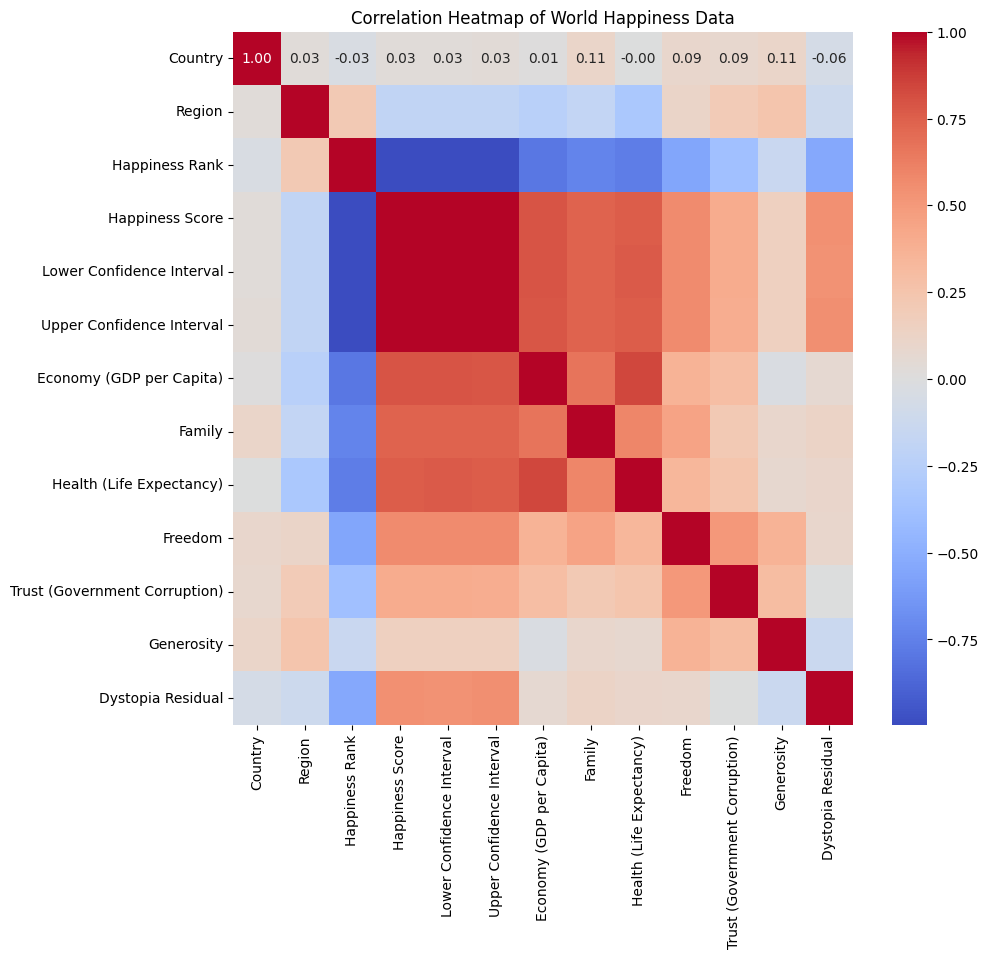

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix

correlation_matrix = label_encoded.corr()

# Get the feature names from the columns of the DataFrame
feature_names = label_encoded.columns

# Plot the heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of World Happiness Data")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('./screenshots/heatmap.png')

plt.show()


## **Histrogram Diagram of Happiness Score and Country**

Highest Score is Denmark which is colored with **Red**. The diagram is interactive with the use of horizontal scorll bar.

## **Scatter Plots of Some Distinct Columns and their correlations among each other**

In [117]:
source = df_sorted

correlations = alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.Color('Country', type='nominal')
).properties(
    width=200,
    height=200
).repeat(
    row=['Happiness Rank','Economy (GDP per Capita)','Freedom'],
    column=['Economy (GDP per Capita)','Happiness Score','Family','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']
).interactive()


correlations.save(f'./plot_htmls/correlations.html', embed_options={'renderer':'svg'})
correlations.save(f'./screenshots/correlations.png')
correlations

alt.RepeatChart(...)

### **HighLighting Important Correlations**

### Happiness Ranks vs Health (Life Expectancy)


In [118]:
healthVSHappiness = alt.Chart(df_sorted,title='Happiness Rank VS Health (Life Expectancy)').mark_trail().encode(
    x='Happiness Rank:Q',
    y='Health (Life Expectancy)',
    size='Health (Life Expectancy)',
).properties(width=400,height=400).interactive()

healthVSHappiness.save('./plot_htmls/healthVSHappiness.html', embed_options={'renderer':'svg'})
healthVSHappiness.save('./screenshots/healthVSHappiness.png')
healthVSHappiness

alt.Chart(...)

### Happiness Rank vs Economy (GDP per Capita)

In [119]:
economyVSHappiness = alt.Chart(df_sorted,title='Happiness Rank VS Economy (GDP per Capita)').mark_trail().encode(
    x='Happiness Rank:Q',
    y='Economy (GDP per Capita):Q',
    size='Economy (GDP per Capita):Q',

).properties(width=400,height=400).interactive()

economyVSHappiness.save('./plot_htmls/economyVSHappiness.html', embed_options={'renderer':'svg'})
economyVSHappiness.save('./screenshots/economyVSHappiness.png')
economyVSHappiness

alt.Chart(...)

In [120]:
from ipywidgets import interact
import ipywidgets as widgets

def displayPlaces(Top):
  bar_chart = alt.Chart(df_sorted[:Top]).mark_bar().encode(
    x=alt.X('Country', sort=None),
    y='Happiness Score',
    color=alt.condition(
        alt.datum['Happiness Rank'] == df_sorted['Happiness Rank'][0],
        alt.value('red'),
        alt.value('steelblue')
    ),
      tooltip=['Country', 'Happiness Rank', 'Happiness Score']
  ).properties(
      title='Overall Happiness Rankings and Scores by Country'
  )
  bar_chart.save('./plot_htmls/histrogramPlot.html', embed_options={'renderer':'svg'})
  bar_chart.save('./screenshots/histrogramPlot.png')
  return bar_chart

interact(displayPlaces, Top=widgets.IntSlider(min=1, max=len(df_sorted), step=1, value=10));


interactive(children=(IntSlider(value=10, description='Top', max=157, min=1), Output()), _dom_classes=('widget…

## **Interactive Scatter Plot of Happiness Score and Health ( Life Expectancy )**

Here, we will create interactive scatter plot with the functionality of **Zooming** and **Opacity**.

In [121]:
selection = alt.selection_point(fields=['Region'], on='mouseover', nearest=True)

scatter_plot = alt.Chart(df,title='Interactive Scatter Plot of Happiness Score & Health (Life Expectancy)').mark_circle().encode(
    x = "Health (Life Expectancy)",
    y = "Happiness Score",
    color=alt.Color('Region', scale=alt.Scale(scheme='spectral')),
    size="Generosity",
    tooltip=["Country", "Happiness Score"],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_params(selection).interactive()


scatter_plot.save(f'./plot_htmls/scatterPlot_HappinessScoreVSHealth.html', embed_options={'renderer':'svg'})
scatter_plot.save(f'./screenshots/scatterPlot_HappinessScoreVSHealth.png')
scatter_plot

alt.Chart(...)

## **Plotting Happiness Ranks Data on World Map and Connecting with Scatter Plot of Region & Happiness Rank**

### Getting UID, Latitude and Longtitude Data of Countries for Plotting on World Map

In [122]:
CASES_WORLDWIDE = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"
df_world = pd.read_csv(CASES_WORLDWIDE)
df_world.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2023-03-10 13:21:02,33.93911,67.709953,209484,7896,NaN,NaN,538.127222,NaN,NaN,3.769262,4,AFG,680,0.0
1,Albania,2023-03-10 13:21:02,41.15330,20.168300,334457,3598,NaN,NaN,11621.968170,NaN,NaN,1.075774,8,ALB,228,2.0
2,Algeria,2023-03-10 13:21:02,28.03390,1.659600,271496,6881,NaN,NaN,619.132366,NaN,NaN,2.534476,12,DZA,90,0.0
3,Andorra,2023-03-10 13:21:02,42.50630,1.521800,47890,165,NaN,NaN,61981.492267,NaN,NaN,0.344540,20,AND,30,0.0
4,Angola,2023-03-10 13:21:02,-11.20270,17.873900,105288,1933,NaN,NaN,320.352770,NaN,NaN,1.835917,24,AGO,104,2.0


Countries Names on two tables are slightly difference. So, we need to process it.

In [123]:
for id in range(len(df_world)):
  currentCountry = df_world.at[id,'Country_Region']

  if currentCountry == 'US':
    df_world.at[id,'Country_Region'] = 'United States'

  if currentCountry == 'Korea, South':
    df_world.at[id,'Country_Region'] = 'South Korea'

  if currentCountry == 'North Korea':
    df_world.at[id,'Country_Region'] = 'Korea, North'

  if currentCountry == 'Burma':
    df_world.at[id,'Country_Region'] = 'Myanmar'

  if currentCountry == 'Taiwan*':
    df_world.at[id,'Country_Region'] = 'Taiwan'

  if currentCountry == 'Taiwan':
    df_world.at[id,'Country_Region'] = 'Taiwan*'


df_world['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Myanmar',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'G

In [124]:
df_sorted['Country'].unique()

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad and Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'North Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Croa

### Adding New Column called **UID** to the main table which containing Happiness Ranks and etc.

In [125]:
import numpy as np
df_temp = df_sorted
df_temp['UID'] = np.nan
df_temp.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,UID
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,NaN
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,NaN
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,NaN
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NaN
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,NaN


Modify the Column Name to have same Name of Column for both tables. And the merge the tables using **Country** Column

In [126]:
df_world.rename(columns={'Country_Region':'Country',"Long_":'Lon'},inplace='TRUE')

In [127]:
merged_df = pd.merge(df_temp, df_world[['Country', 'UID','Lat',	'Lon']], on='Country', how='left',suffixes=('_drop', '') )
merged_df.drop('UID_drop', axis=1, inplace=True)
merged_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,UID,Lat,Lon
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,208.0,56.2639,9.5018
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,756.0,46.8182,8.2275
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,352.0,64.9631,-19.0208
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,578.0,60.4720,8.4689
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,246.0,61.9241,25.7482


### Cleaning Data ( Removing Rows which contain Nan Values )

In [128]:
merged_df = merged_df.dropna()
merged_df["UID"].isna().unique()
merged_df['Country'].isna().unique()
merged_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'UID', 'Lat', 'Lon'],
      dtype='object')

### Interactive World Map of Happiness Rank

In [129]:
from vega_datasets import data

source = alt.topo_feature(data.world_110m.url, "countries")

selection = alt.selection_point(fields=['Happiness Rank'], on='mouseover')

background = alt.Chart(source,title='World Map Data of Happiness Rank',).mark_geoshape(fill="white")
color_scale = alt.Scale(scheme="spectral", reverse=True)

foreground = (
    alt.Chart(source,title='World Map Data of Happiness Rank',).mark_geoshape(
        stroke="black", strokeWidth=0.15,opacity=0.2,
    ).encode(
        color=alt.Color("Happiness Rank:Q", scale=color_scale),


        # alt.Color(
        #     "Happiness Rank:N", scale=alt.Scale(scheme="lightgreyred"), legend=None,
        # ),
        opacity=alt.condition(selection, alt.value(1), alt.value(0.4)),
        tooltip=[
            alt.Tooltip("Country:N", title="Country"),
            alt.Tooltip("Happiness Rank:Q", title="Happiness Rank"),
        ],
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(merged_df, "UID", ["Happiness Rank", "Country"]),
    ).add_params(selection).properties(
    width=400,
    height=400
)
)

map_chart = (
    (background + foreground)
    .properties(width=700, height=400)
    .project("naturalEarth1")
)


# Create scatter plot for Happiness Score vs. Economy GDP
scatter_plot = alt.Chart(df,title='Scatter Plot of Happiness Rank & Region').mark_circle().encode(
    x = "Region",
    y = "Happiness Rank",
    color=alt.Color('Happiness Rank', scale=alt.Scale(scheme='spectral')),
    size="Generosity",
    tooltip=["Country", "Happiness Score",'Happiness Rank'],
    opacity=alt.condition(selection,alt.value(1),alt.value(.05))
).add_params(selection)


# Display the combined chart
(map_chart | scatter_plot).save(f'./plot_htmls/world_map.html', embed_options={'renderer':'svg'})
(map_chart | scatter_plot).save(f'./screenshots/world_map.png')
(map_chart | scatter_plot)

alt.HConcatChart(...)

### **Summary of Design Elements and Justification**



Our project focuses on analyzing World Happiness Data to understand the factors influencing happiness rankings across different countries. Key design elements include:

* Data Exploration: We examined various features such as GDP per capita, social support, life expectancy, freedom, and government corruption to understand their impact on happiness scores.

* Visualization Techniques: We utilized histograms, pie charts, and scatter plots to visualize the distribution of happiness scores, regional data distribution, and correlations between different factors and happiness rankings.

* Interpretation: Through our analysis, we identified Denmark as having the highest happiness rank and explored correlations between economic factors, social support, health, freedom, and government corruption with happiness rankings.

### **Final Evaluation Approach**



- **Target Question:**

    The primary question we aim to answer through our visualization is:"What are the key factors influencing happiness rankings across different countries?"

- **People Recruited:**

    Due to the difficulty of recruiting experts, we will engage colleagues, friends, classmates, or family members to evaluate our designs. We aim to recruit at least three individuals representing diverse backgrounds and perspectives.

- **Measures Used:**

    We will measure the effectiveness of our visualization based on:
Insight Depth: The extent to which participants gain a deep understanding of the relationship between happiness rankings and various factors.
Use Cases: How well participants can identify practical applications or implications of the insights gained from the visualization.
Accuracy: The degree to which participants perceive the visualization accurately represents the data and its underlying trends.

- **Approach:**

    We will conduct a semi-structured interview approach, where participants will be presented with our visualizations and asked to provide feedback based on a series of predefined questions.
Participants will be encouraged to explore the visualizations independently and then engage in a guided discussion to share their thoughts, insights, and suggestions.

- **Instantiation of Methods:**

    Participants will be provided with access to the visualizations either in person or through digital platforms.
They will be asked to spend a few minutes exploring the visualizations, taking note of any observations or insights they gather.
Following the exploration period, participants will engage in a one-on-one or group discussion with the researcher, where they will be prompted to answer specific questions about their experience, understanding, and suggestions for improvement.

- **Criteria for Success:**

    The evaluation will be deemed successful if:
Participants demonstrate a clear understanding of the relationship between happiness rankings and the identified factors.
Participants are able to identify practical implications or applications of the insights gained from the visualization.
Participants provide constructive feedback for refinement, indicating areas of improvement and potential enhancements.



**Synthesis of Findings**

- **Elements that Worked Well:**

    - The use of various visualization techniques effectively conveyed the complex relationships within the data.

    - Participants demonstrated a strong understanding of the key factors influencing happiness rankings.

    - The semi-structured interview approach facilitated meaningful discussions and elicited valuable insights from participants.

- **Elements to Refine in Future Iterations:**

    - Incorporating expert feedback to gain deeper insights and validation of the visualization approach.

    - Exploring additional factors or dimensions of happiness to provide a more comprehensive understanding.

    - Enhancing the accessibility and interactivity of the visualizations to cater to a wider audience and facilitate deeper engagement.

This evaluation approach and synthesis of findings will guide future iterations of the visualization design, ensuring continuous improvement and refinement.